# Prediction of resale price to avoid COV using data analysis.
### Problem statement: 
Amidst the robust HDB resale market and lack of information regarding HDB’s valuation of flat, buyers are unknowingly paying COV.
### Objective: 
The aim of this project was to conduct data analysis and machine learning to avoid unreasonably high cash over valuation for optimal home financing in central CBD area.

In [1]:
#For removing warning messages which is not important
import warnings
warnings.filterwarnings('ignore')

In [2]:
#basic library
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 

In [3]:
#import data
HDBresale = pd.read_csv('Resaleflatprices.csv')
HDBresale.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [4]:
def convert_to_months(lease):
    try:
        components = lease.split()
        years = int(components[0])
        if len(components) > 2 and components[2].isdigit():
            months = int(components[2])
        else:
            months = 0
        return years * 12 + months
    except (ValueError, IndexError):
        print("Error converting:", lease)
        return None  # or any other handling mechanism you prefer

# Apply the function to the 'remaining_lease' column
HDBresale['remaining_lease_in_months'] = HDBresale['remaining_lease'].apply(convert_to_months)


In [5]:
HDBresale

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,remaining_lease_in_months
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,736
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,727
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,749
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,745
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,749
...,...,...,...,...,...,...,...,...,...,...,...,...
173676,2024-02,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,62 years 11 months,795000.0,755
173677,2024-02,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,62 years 10 months,935000.0,754
173678,2024-02,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,62 years 11 months,908000.0,755
173679,2024-02,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,63 years,800000.0,756


In [6]:
HDBresale['purchasing_month'] = HDBresale['month'].str.split('-').str[1]
HDBresale

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,remaining_lease_in_months,purchasing_month
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,736,01
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,727,01
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,749,01
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,745,01
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,749,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173676,2024-02,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,62 years 11 months,795000.0,755,02
173677,2024-02,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,62 years 10 months,935000.0,754,02
173678,2024-02,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,62 years 11 months,908000.0,755,02
173679,2024-02,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,63 years,800000.0,756,02


##### Extracting only the central area which is the focus of our project.

In [7]:
#extract centralarea data
HDB_central = HDBresale[HDBresale['town'] == 'CENTRAL AREA']
HDB_central.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,remaining_lease_in_months,purchasing_month
299,2017-01,CENTRAL AREA,2 ROOM,9,JLN KUKOH,04 TO 06,55.0,Improved,1982,64 years,250000.0,768,01
300,2017-01,CENTRAL AREA,3 ROOM,640,ROWELL RD,01 TO 03,84.0,Model A,1984,66 years 05 months,360000.0,797,01
301,2017-01,CENTRAL AREA,3 ROOM,264,WATERLOO ST,16 TO 18,68.0,Improved,1986,68 years 09 months,400000.0,825,01
302,2017-01,CENTRAL AREA,3 ROOM,32,NEW MKT RD,07 TO 09,66.0,Standard,1983,65 years 03 months,428000.0,783,01
303,2017-01,CENTRAL AREA,3 ROOM,5,TG PAGAR PLAZA,07 TO 09,59.0,Improved,1977,59 years 01 month,455000.0,709,01


# Data Exploration
### 1. Categorical Variables (Flat Type, Street Name, Storey Range, Flat Model, Block Numbers)

In [8]:
#Extract flat model and resale price
flatmodel = pd.DataFrame(HDB_central[['resale_price','flat_model']])
flatmodel.head()

,resale_price,flat_model
299,250000.0,Improved
300,360000.0,Model A
301,400000.0,Improved
302,428000.0,Standard
303,455000.0,Improved


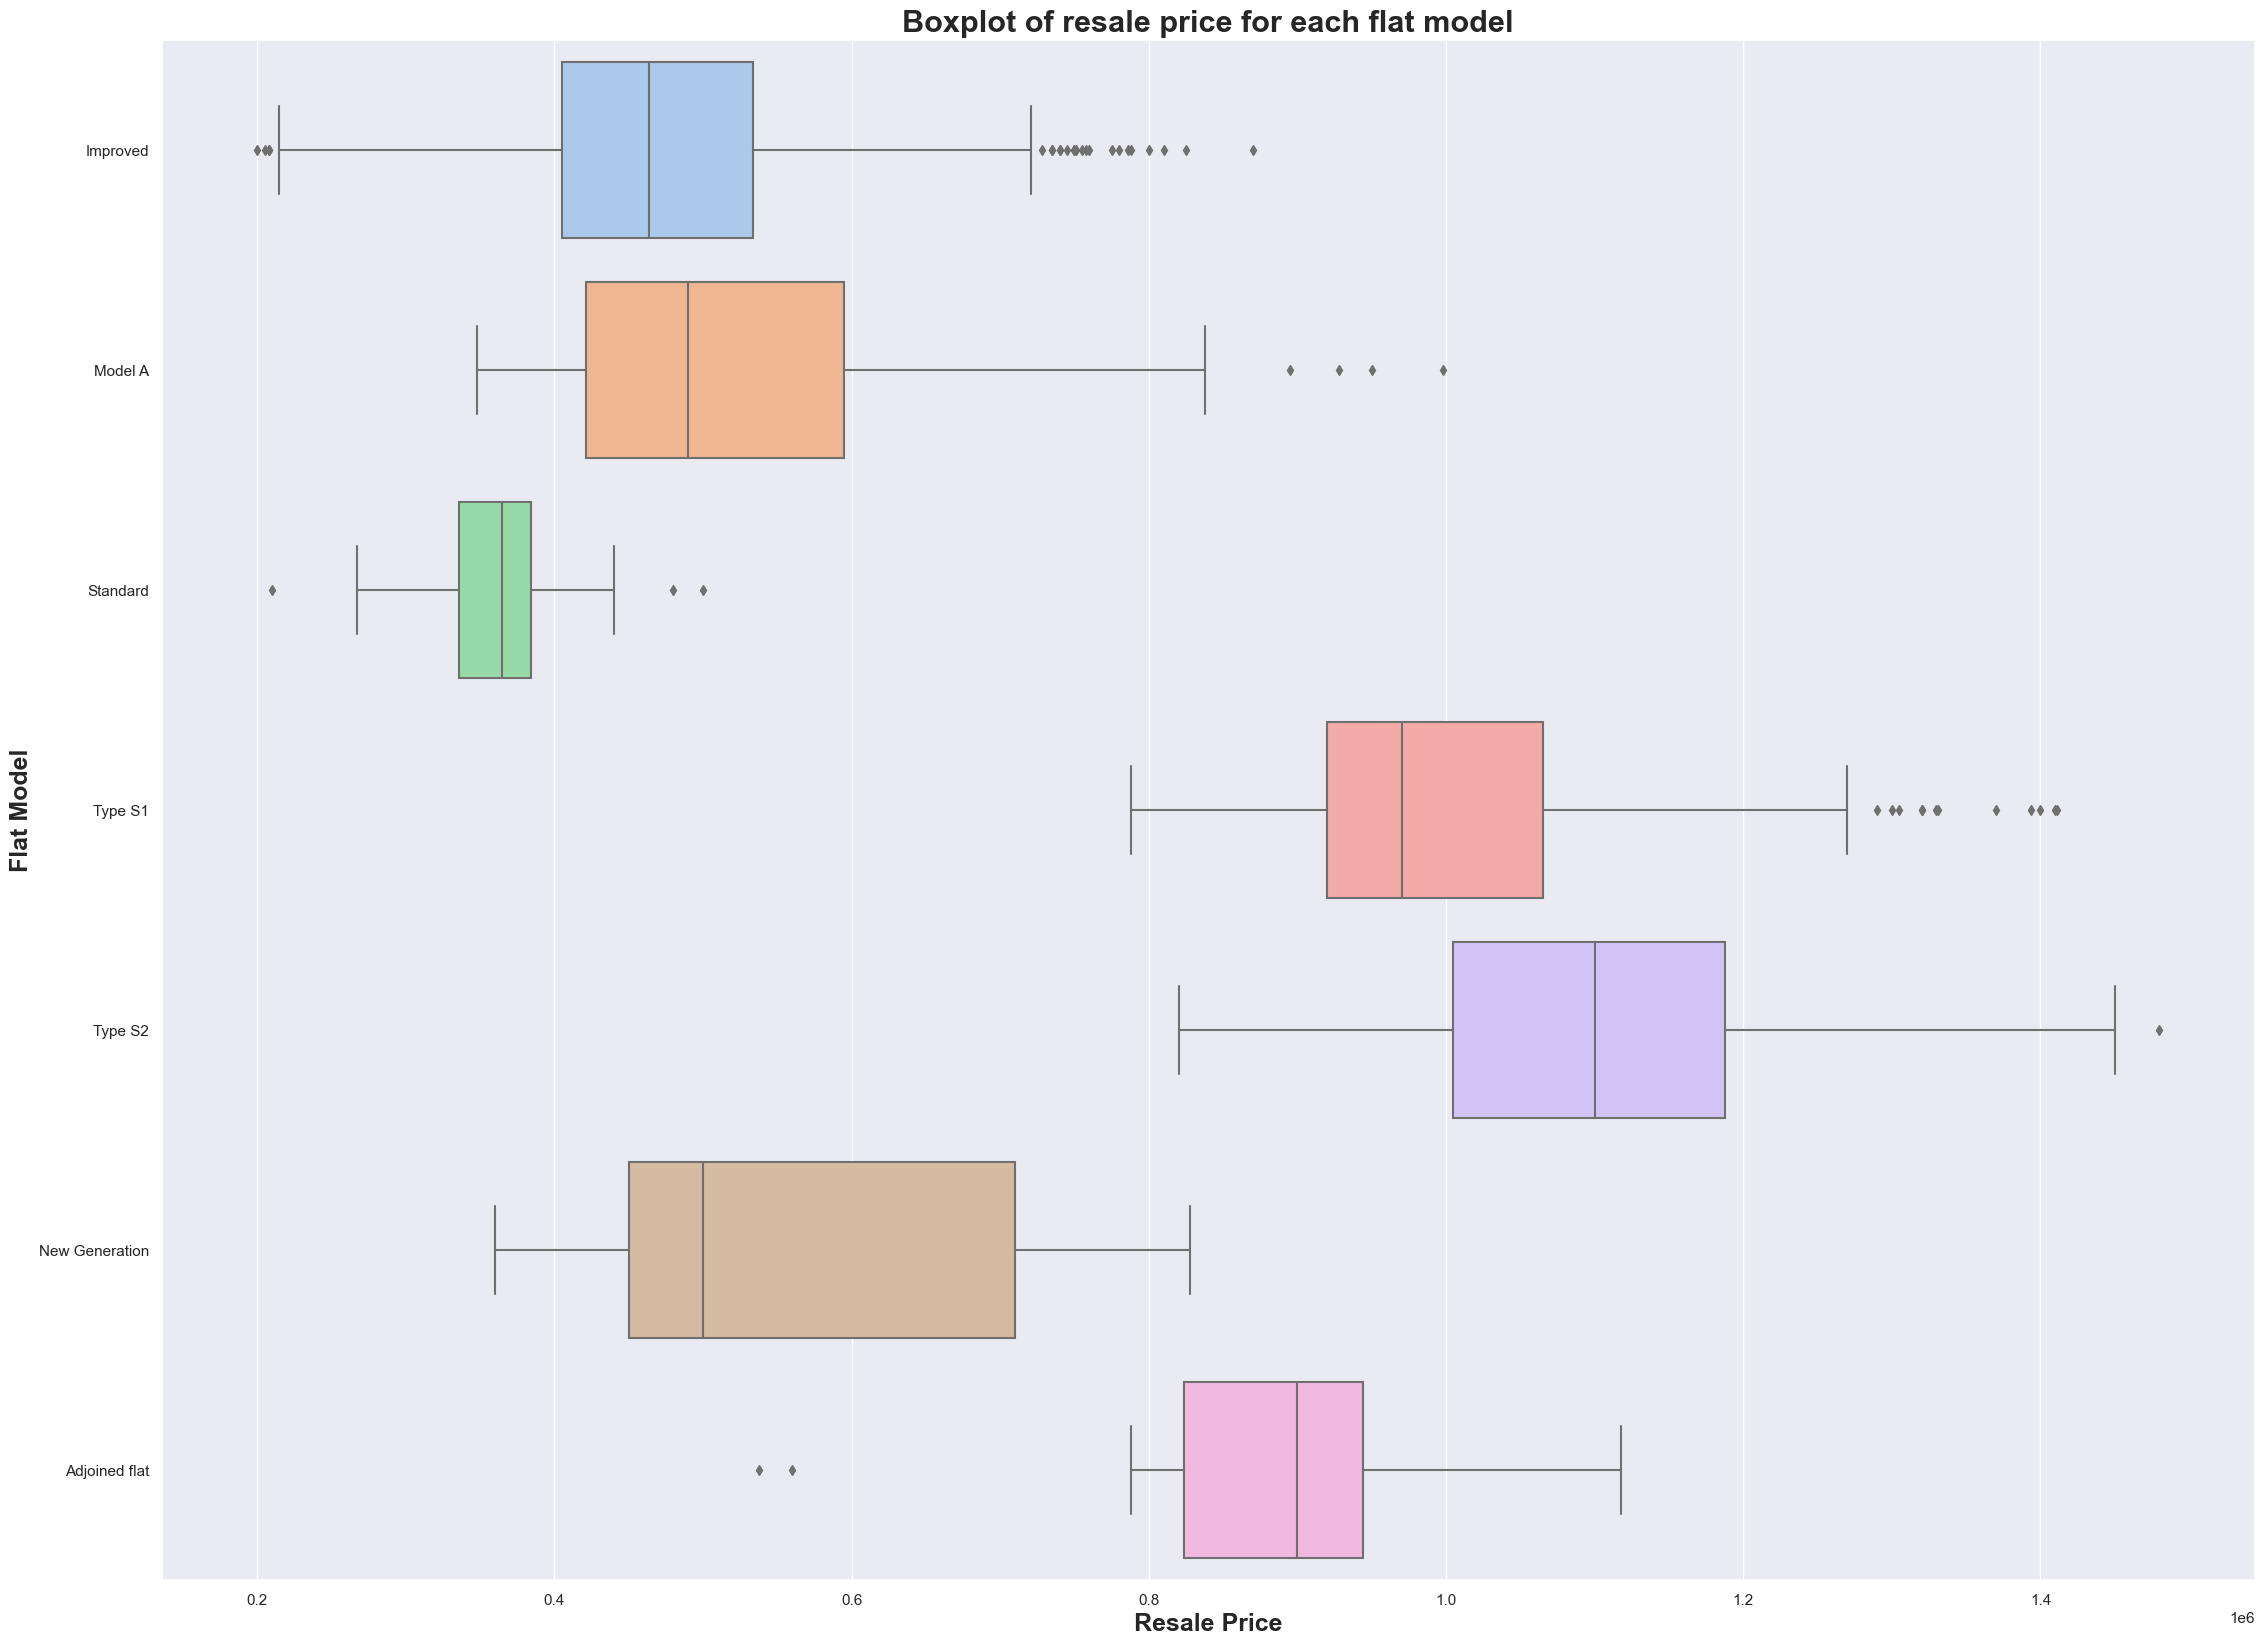

In [9]:
#Boxplot for flat model vs resale price
flatmodel = pd.DataFrame(HDB_central[['resale_price','flat_model']])
plt.figure(figsize=(27,20))
sb.boxplot(x = 'resale_price', y = 'flat_model', data = flatmodel,  palette = "pastel")
plt.title("Boxplot of resale price for each flat model", fontweight = 'bold', fontsize = 22);
plt.xlabel('Resale Price', fontsize = 18, fontweight = 'bold');
plt.ylabel('Flat Model', fontsize = 18, fontweight = 'bold');

From the boxplot, it was observed that Type S2 and S1 seems to have the highest resale price compared to the standard,improved, model A and new generation.\
\
This could be due to (to be searched)

In [10]:
#Extract street name and resale price
streetname = pd.DataFrame(HDB_central[['resale_price','street_name']])
streetname.head()

,resale_price,street_name
299,250000.0,JLN KUKOH
300,360000.0,ROWELL RD
301,400000.0,WATERLOO ST
302,428000.0,NEW MKT RD
303,455000.0,TG PAGAR PLAZA


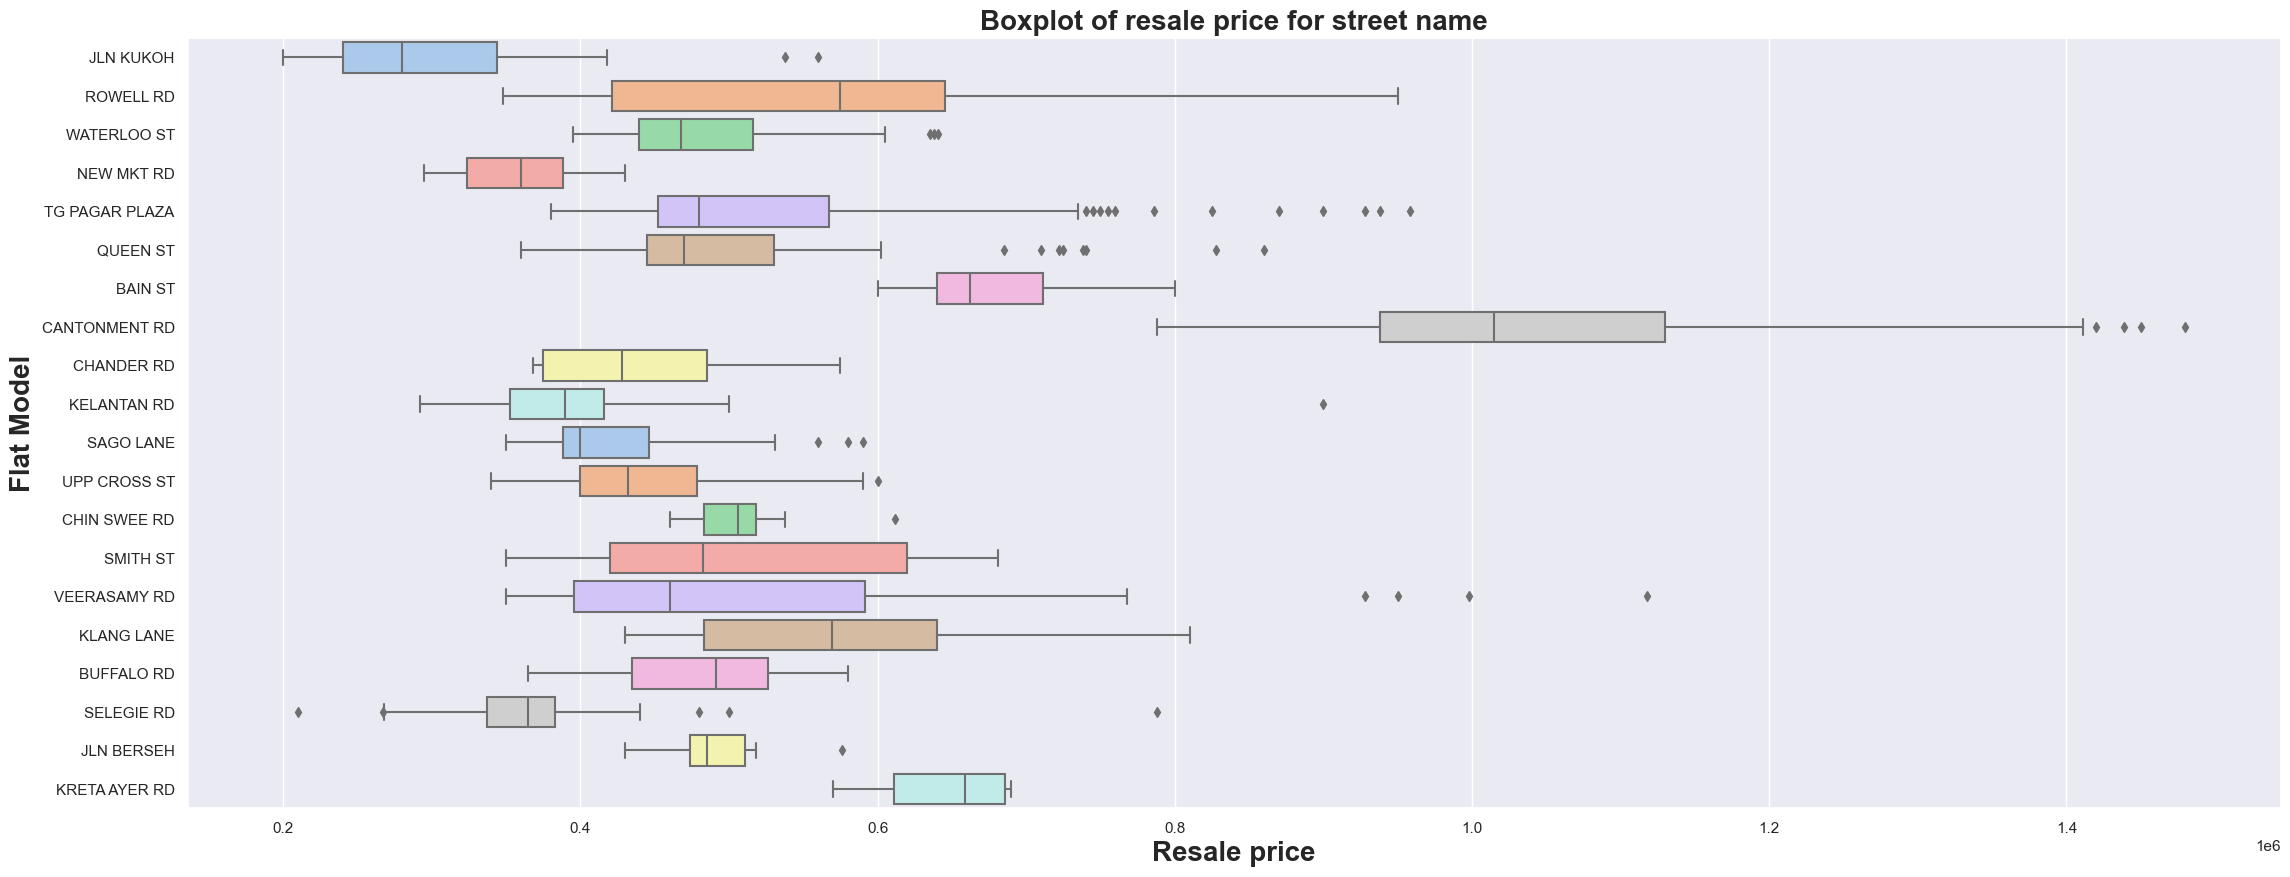

In [11]:
#To plot a graph of box plot for streetname against resale price
plt.figure(figsize=(27,10))
sb.boxplot(x = 'resale_price', y = 'street_name', data = streetname,  palette = "pastel")
plt.title("Boxplot of resale price for street name", fontweight = 'bold', fontsize = 20);
plt.xlabel('Resale price', fontsize = 20, fontweight = 'bold');
plt.ylabel('Flat Model', fontsize = 20, fontweight = 'bold');

In [12]:
#Extract block numbers and resale price
blocknumbers = pd.DataFrame(HDB_central[['resale_price','block']])
blocknumbers.head()

,resale_price,block
299,250000.0,9
300,360000.0,640
301,400000.0,264
302,428000.0,32
303,455000.0,5


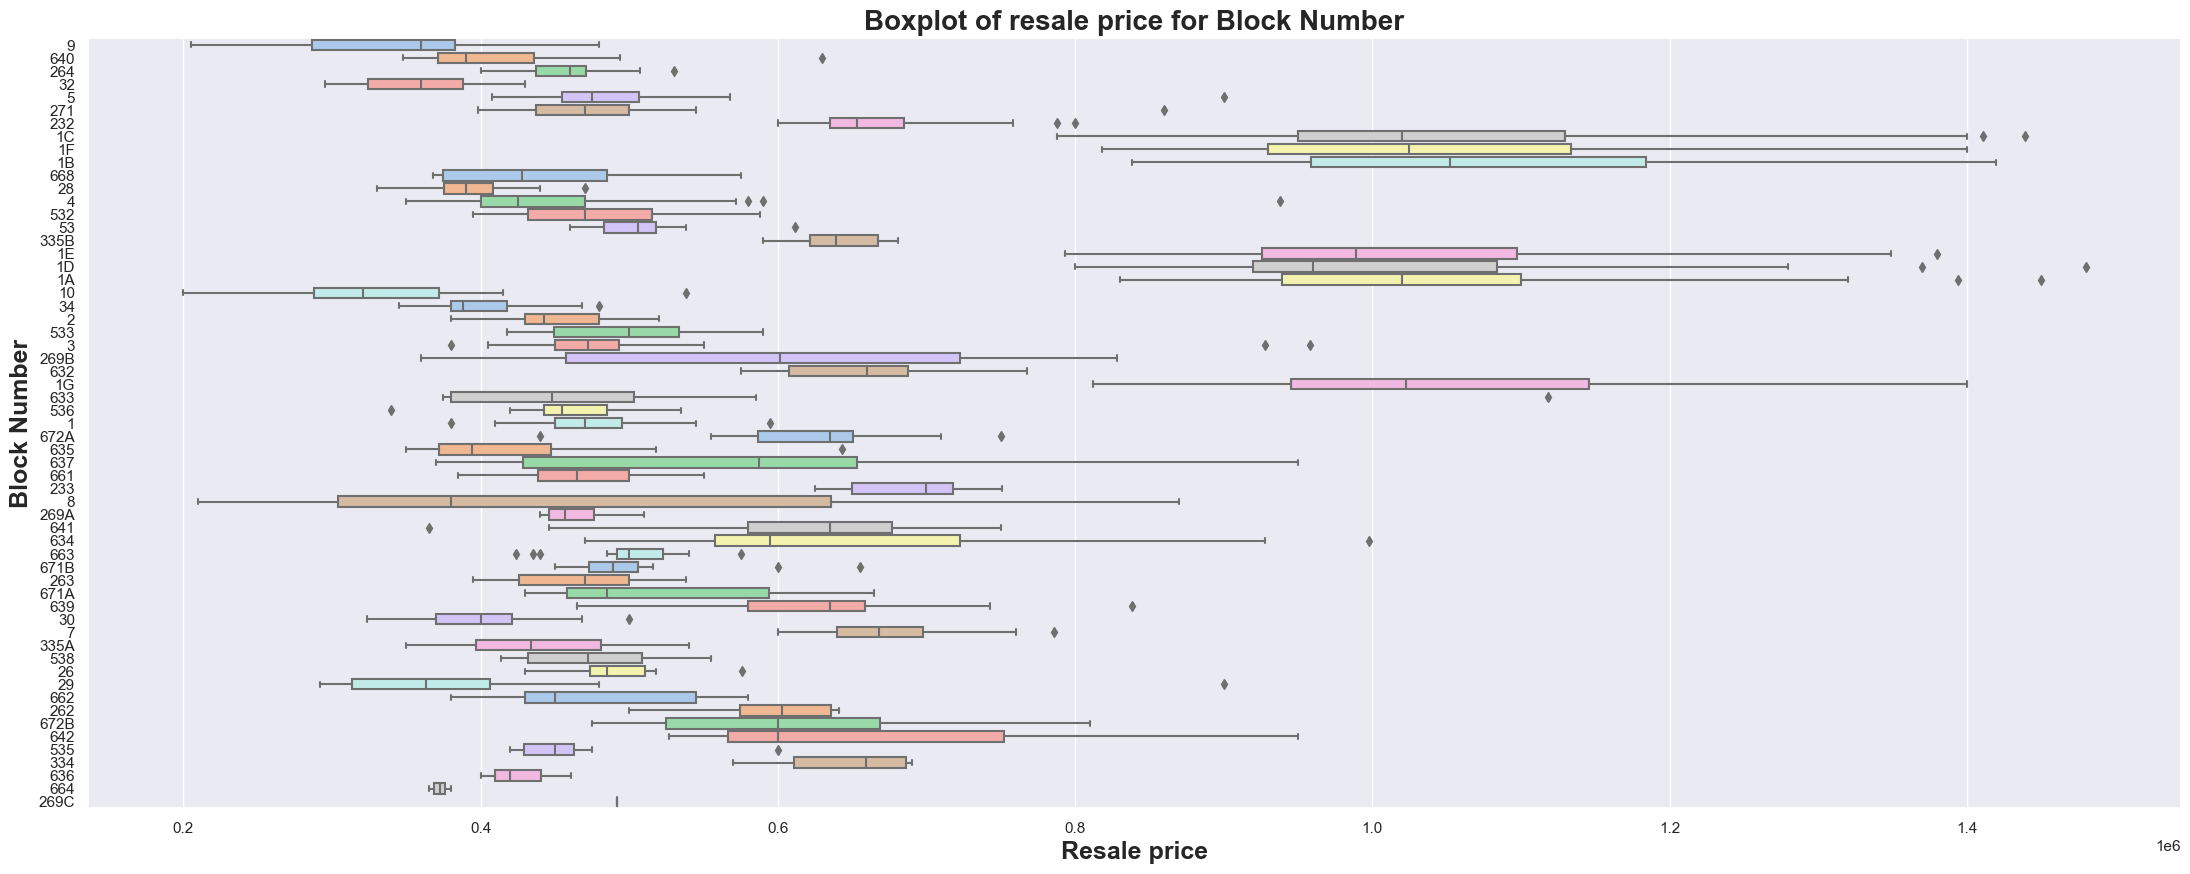

In [13]:
#To plot a graph of box plot for block against resale price
plt.figure(figsize=(27,10))
sb.boxplot(x = 'resale_price', y = 'block', data = blocknumbers,  palette = "pastel")
plt.title("Boxplot of resale price for Block Number", fontweight = 'bold', fontsize = 20);
plt.xlabel('Resale price', fontsize = 18, fontweight = 'bold');
plt.ylabel('Block Number', fontsize = 18, fontweight = 'bold');

From the boxplot for block number and street name against resale price, not much trend was observed.\
\
This could be due to when buyers are considering to buy flat unit, buyers are highly unlikely to consider street name and block numbers unless the block number is an auspicious number. Street location should be the main consideration such as accessibility to MRT.\
\
In future work, street name and block number can be plotted on a map and use possible data analysis skills to discuss the correlation of the categorical variables and resale prices.

In [14]:
#Extract flattype and resale price
storeyrange = pd.DataFrame(HDB_central[['resale_price','storey_range']])
storeyrange.head()

,resale_price,storey_range
299,250000.0,04 TO 06
300,360000.0,01 TO 03
301,400000.0,16 TO 18
302,428000.0,07 TO 09
303,455000.0,07 TO 09


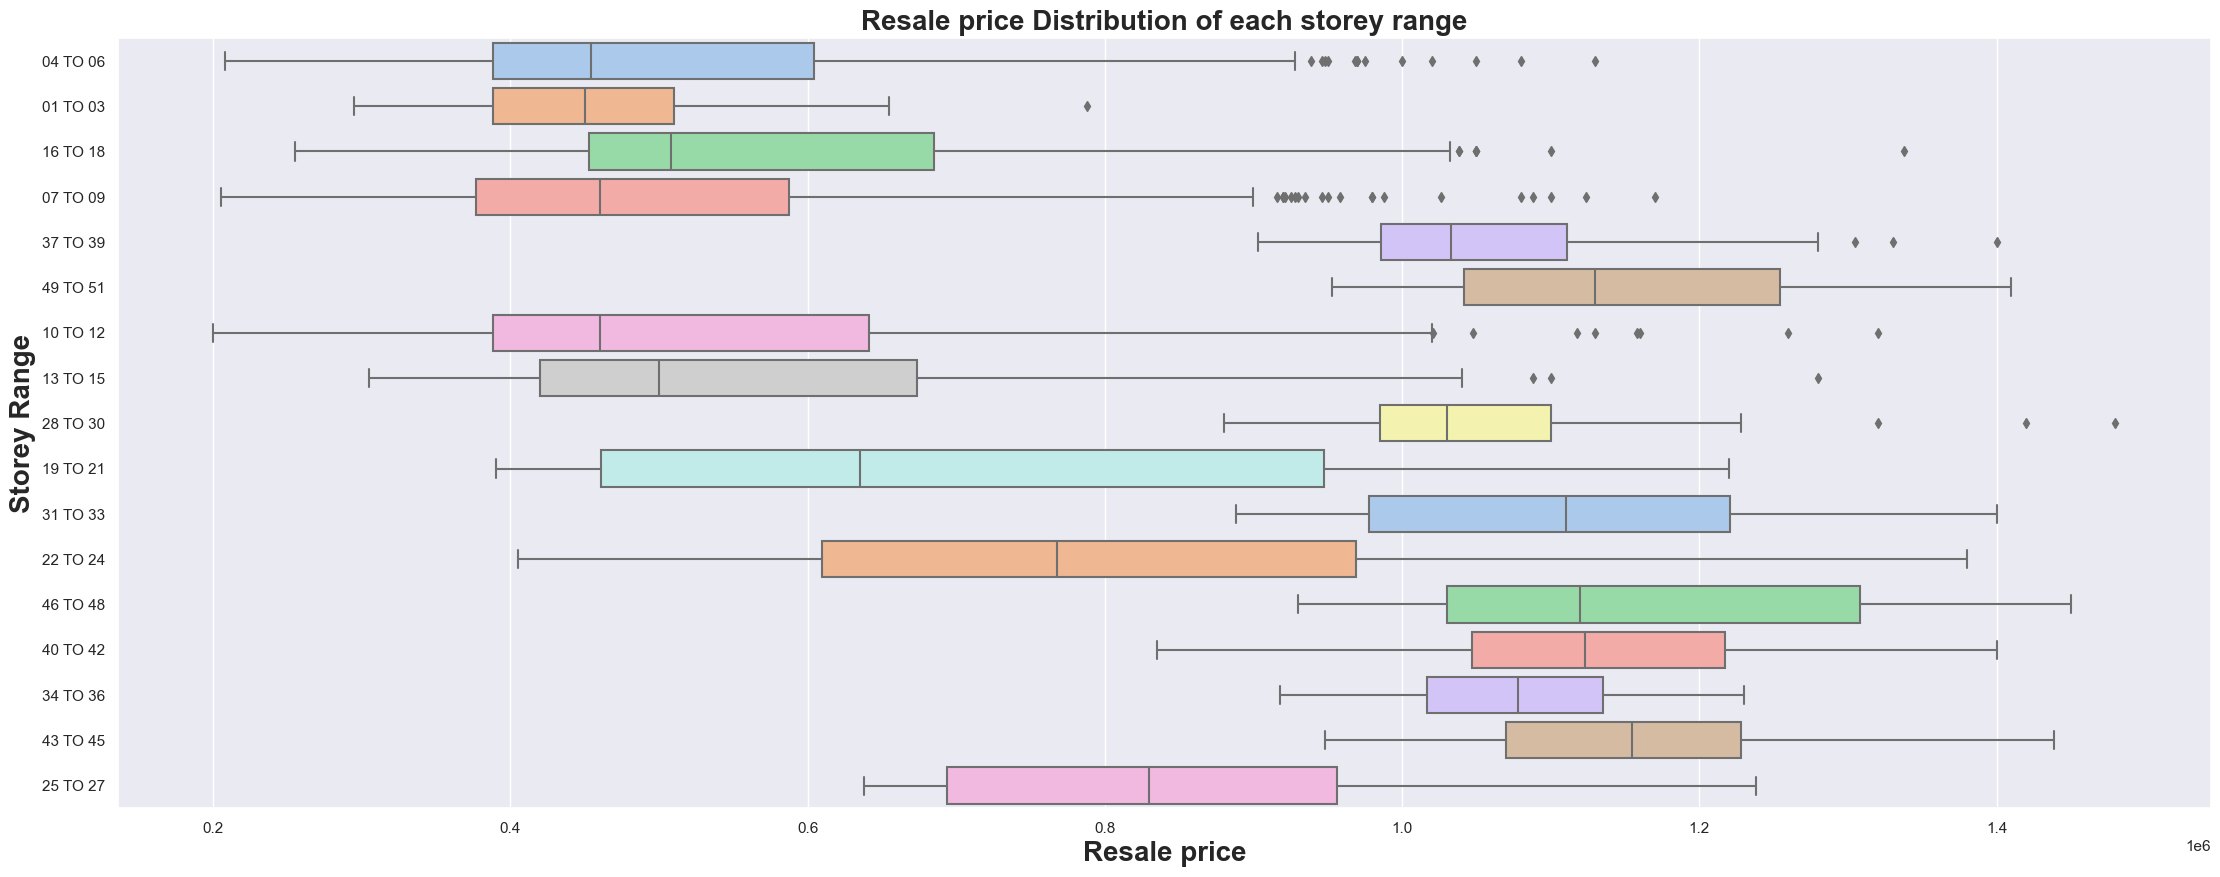

In [15]:
#To plot a graph of box plot for storey range against resale price
plt.figure(figsize=(27,10))
sb.boxplot(x = 'resale_price', y = 'storey_range', data = storeyrange,  palette = "pastel")
plt.title("Resale price Distribution of each storey range", fontweight = 'bold', fontsize = 20);
plt.xlabel('Resale price', fontsize = 20, fontweight = 'bold');
plt.ylabel('Storey Range', fontsize = 20, fontweight = 'bold');

From the boxplot, it was observed that storey range seems to have correlation with resale price, where the higher the storey range, the higher the resale price.\
\
Additionally, 3 clusters can be observed from the boxplot; cluster 1 (low floor): 01-18, cluster 2 (mid floor): 19-27, cluster 3(high floor): 28-51.\
\
By labelling the 3 clusters as numerical value (1,2,3) respectively, a linear regression of resale price and storey range can be achieved to study the correlation of storey range and resale price.

In [16]:
#Extract flattype and resale price
flattype = pd.DataFrame(HDB_central[['resale_price','flat_type']])
flattype.head()

,resale_price,flat_type
299,250000.0,2 ROOM
300,360000.0,3 ROOM
301,400000.0,3 ROOM
302,428000.0,3 ROOM
303,455000.0,3 ROOM


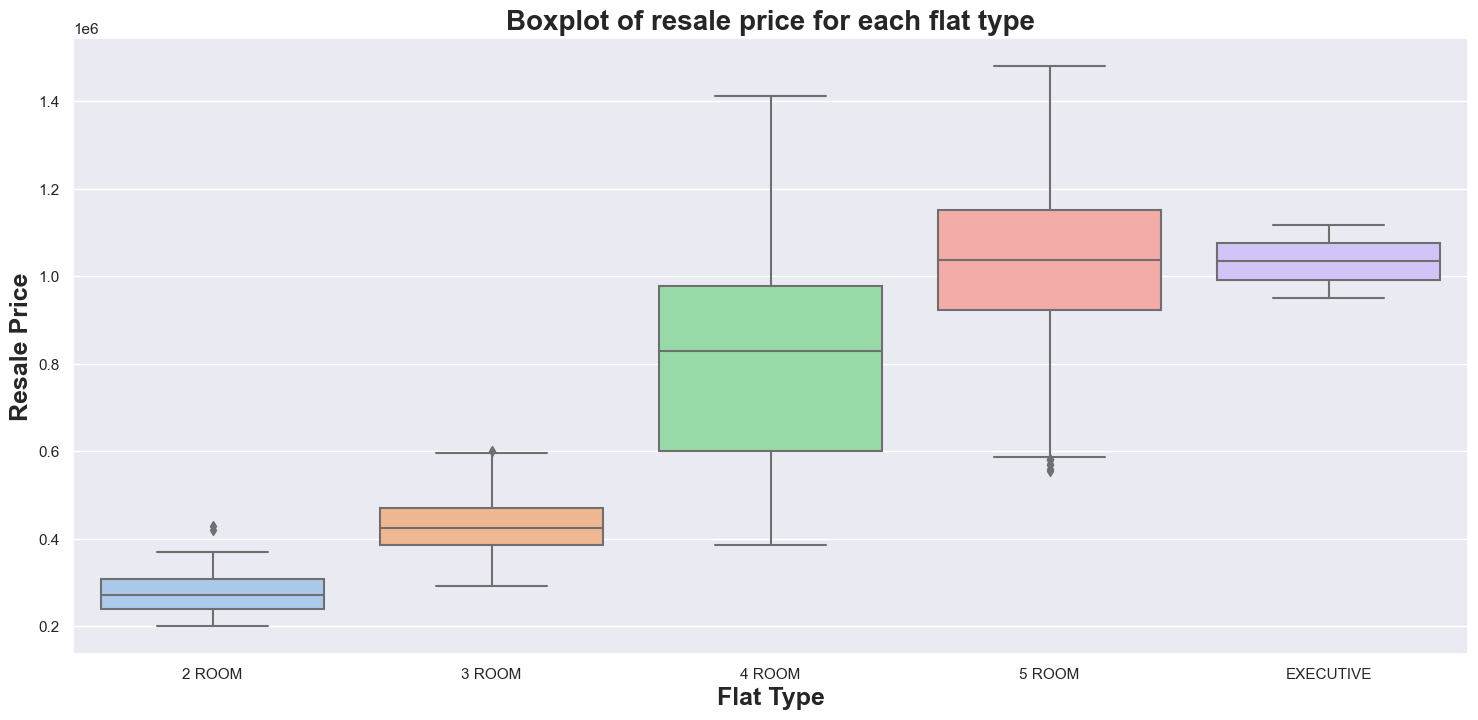

In [17]:
#To plot a graph of box plot for flat type against resale price
f = plt.figure(figsize=(18, 8))
sb.boxplot(x = 'flat_type', y = 'resale_price', data = flattype, palette = "pastel")
plt.title("Boxplot of resale price for each flat type", fontweight = 'bold', fontsize = 20);
plt.xlabel('Flat Type', fontsize = 18, fontweight = 'bold');
plt.ylabel('Resale Price', fontsize = 18, fontweight = 'bold');

From the boxplot, it was observed that flat type seems to have correlation with resale price, where the higher the flat type, the higher the resale price.\
\
Hence, by labelling each flat type (2 room, 3 room... to executive) as numerical value (2,3...,to 6) respectively, a linear regression of resale price and flat type can be achieved to study the correlation of storey range and resale price.

In [19]:
#Extract month and resale price
month = pd.DataFrame(HDB_central[['resale_price','purchasing_month']])
month.head()

,resale_price,purchasing_month
299,250000.0,01
300,360000.0,01
301,400000.0,01
302,428000.0,01
303,455000.0,01


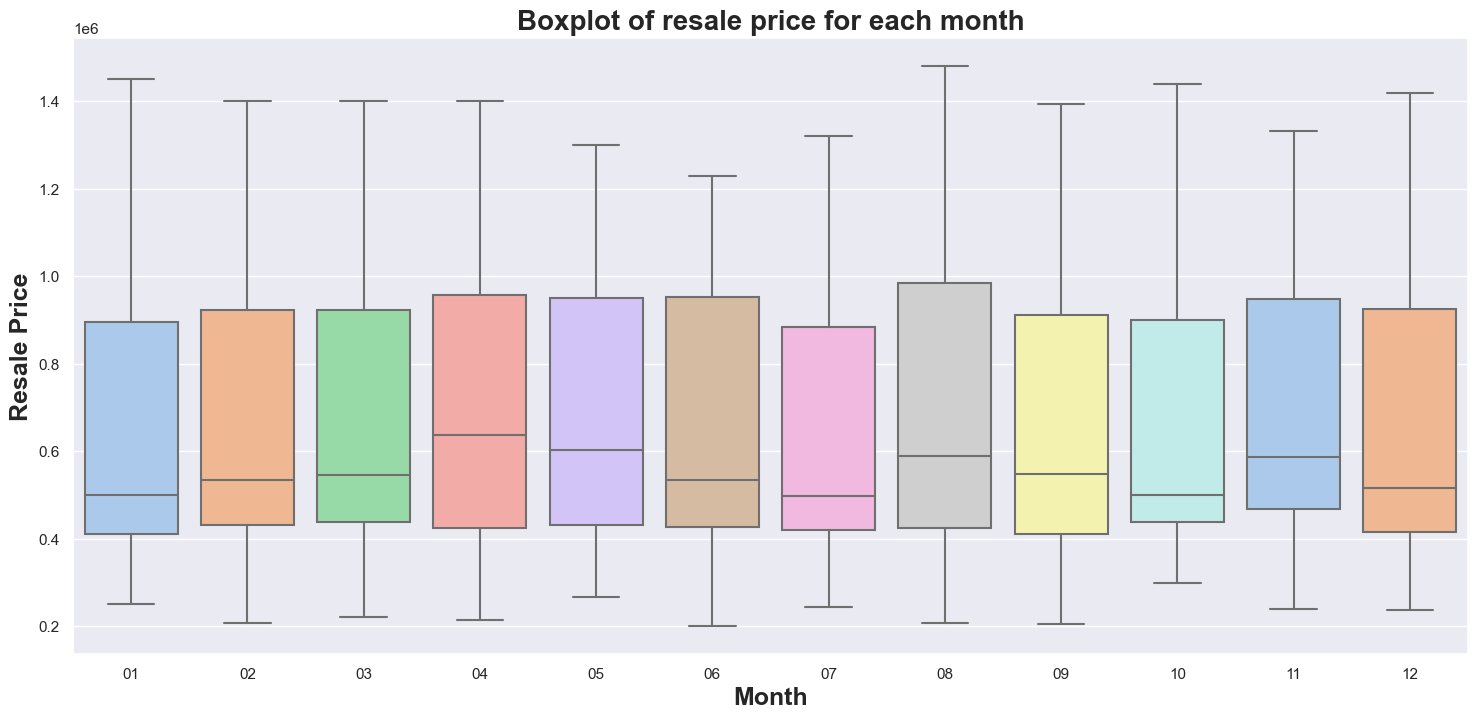

In [21]:
#To plot a graph of box plot for month against resale price
f = plt.figure(figsize=(18, 8))
sb.boxplot(x = 'purchasing_month', y = 'resale_price', data = month, palette = "pastel")
plt.title("Boxplot of resale price for each month", fontweight = 'bold', fontsize = 20);
plt.xlabel('Month', fontsize = 18, fontweight = 'bold');
plt.ylabel('Resale Price', fontsize = 18, fontweight = 'bold');

# 2. Numerical Variables (Lease commence date, Floor Square Area)
Lease remaining and month information is asssumed to be embedded in lease commence date information as lease remaining is calculated from lease commence date.\
\
Additionally, as discussed, the flat type and storey range can be converted into numerical information to perform linear regression against resale price for their correlation.

In [27]:
#Extract relevant numerical data
HDB_numdata = pd.DataFrame(HDB_central[["floor_area_sqm","remaining_lease_in_months", "resale_price"]])
HDB_numdata.head()

,floor_area_sqm,remaining_lease_in_months,resale_price
299,55.0,768,250000.0
300,84.0,797,360000.0
301,68.0,825,400000.0
302,66.0,783,428000.0
303,59.0,709,455000.0


In [28]:
#To understand the dtypes of each variable.
HDB_numdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1407 entries, 299 to 172232
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   floor_area_sqm             1407 non-null   float64
 1   remaining_lease_in_months  1407 non-null   int64  
 2   resale_price               1407 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 44.0 KB


In [30]:
# To convert object types into numerical types.
for x in ['floor_area_sqm', 'resale_price', 'remaining_lease_in_months']:
    HDB_numdata[x] = HDB_numdata[x].astype(np.int64)

HDB_numdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1407 entries, 299 to 172232
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   floor_area_sqm             1407 non-null   int64
 1   remaining_lease_in_months  1407 non-null   int64
 2   resale_price               1407 non-null   int64
dtypes: int64(3)
memory usage: 44.0 KB


In [31]:
#To study the correlation of numerical varaible with resale price
HDBcorr = HDB_numdata.corr()
HDBcorr

,floor_area_sqm,remaining_lease_in_months,resale_price
floor_area_sqm,1.000000,0.681070,0.762851
remaining_lease_in_months,0.681070,1.000000,0.835773
resale_price,0.762851,0.835773,1.000000


<Axes: >

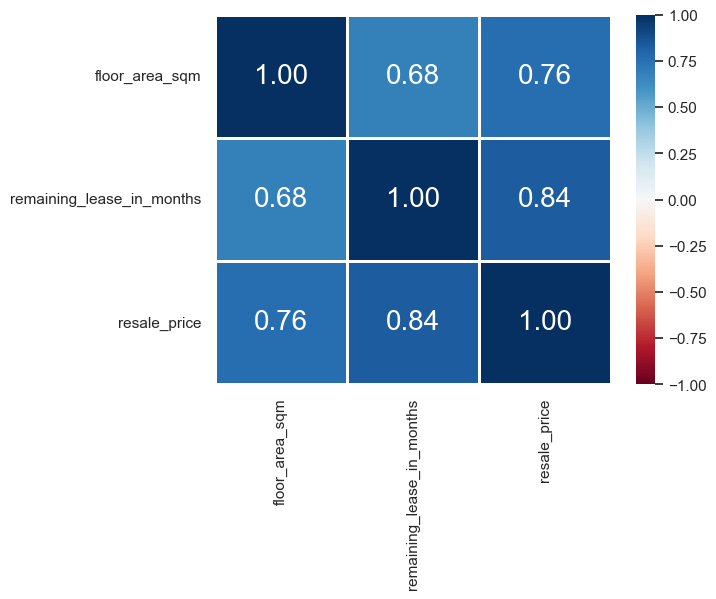

In [32]:
#Plotting of heatmap to visualise the correlation of numerical variable against resale price
sb.heatmap(HDBcorr, vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size":20}, cmap = "RdBu")

Hence, it can be observed that the correlation between resale price and flat type, floor area, lease commence data and storey range is quite high of 0.78, 0.76, 0.86, 0.7 respectively.\
\
Thus, the variables will be included in the linear regression against resale price.

# Linear Regression of the variables identified against Resale Price

In [33]:
#Extract each variables to different data frame

HDB_floor = pd.DataFrame(HDB_numdata['floor_area_sqm'])
HDB_remaininglease = pd.DataFrame(HDB_numdata['remaining_lease_in_months'])
HDB_price = pd.DataFrame(HDB_numdata['resale_price'])

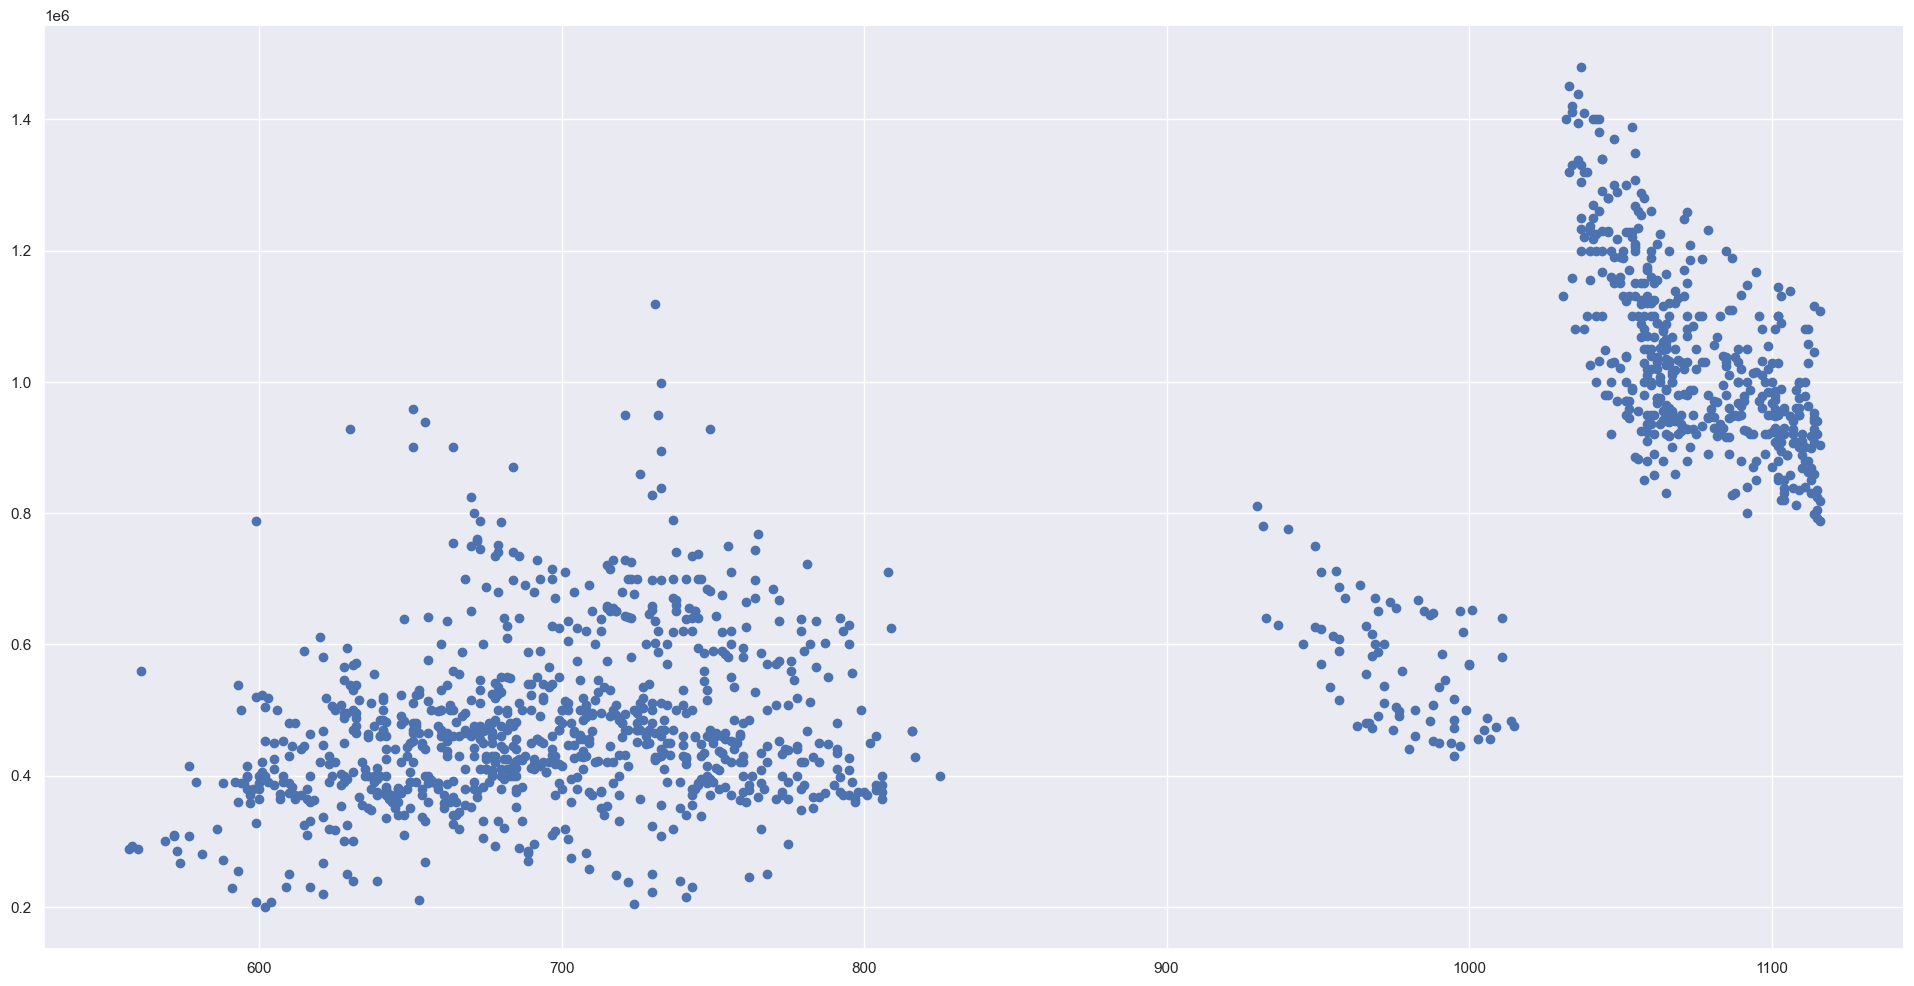

In [34]:
f= plt.subplots(figsize=(24, 12))   
plt.scatter(x = HDB_remaininglease, y = HDB_price)

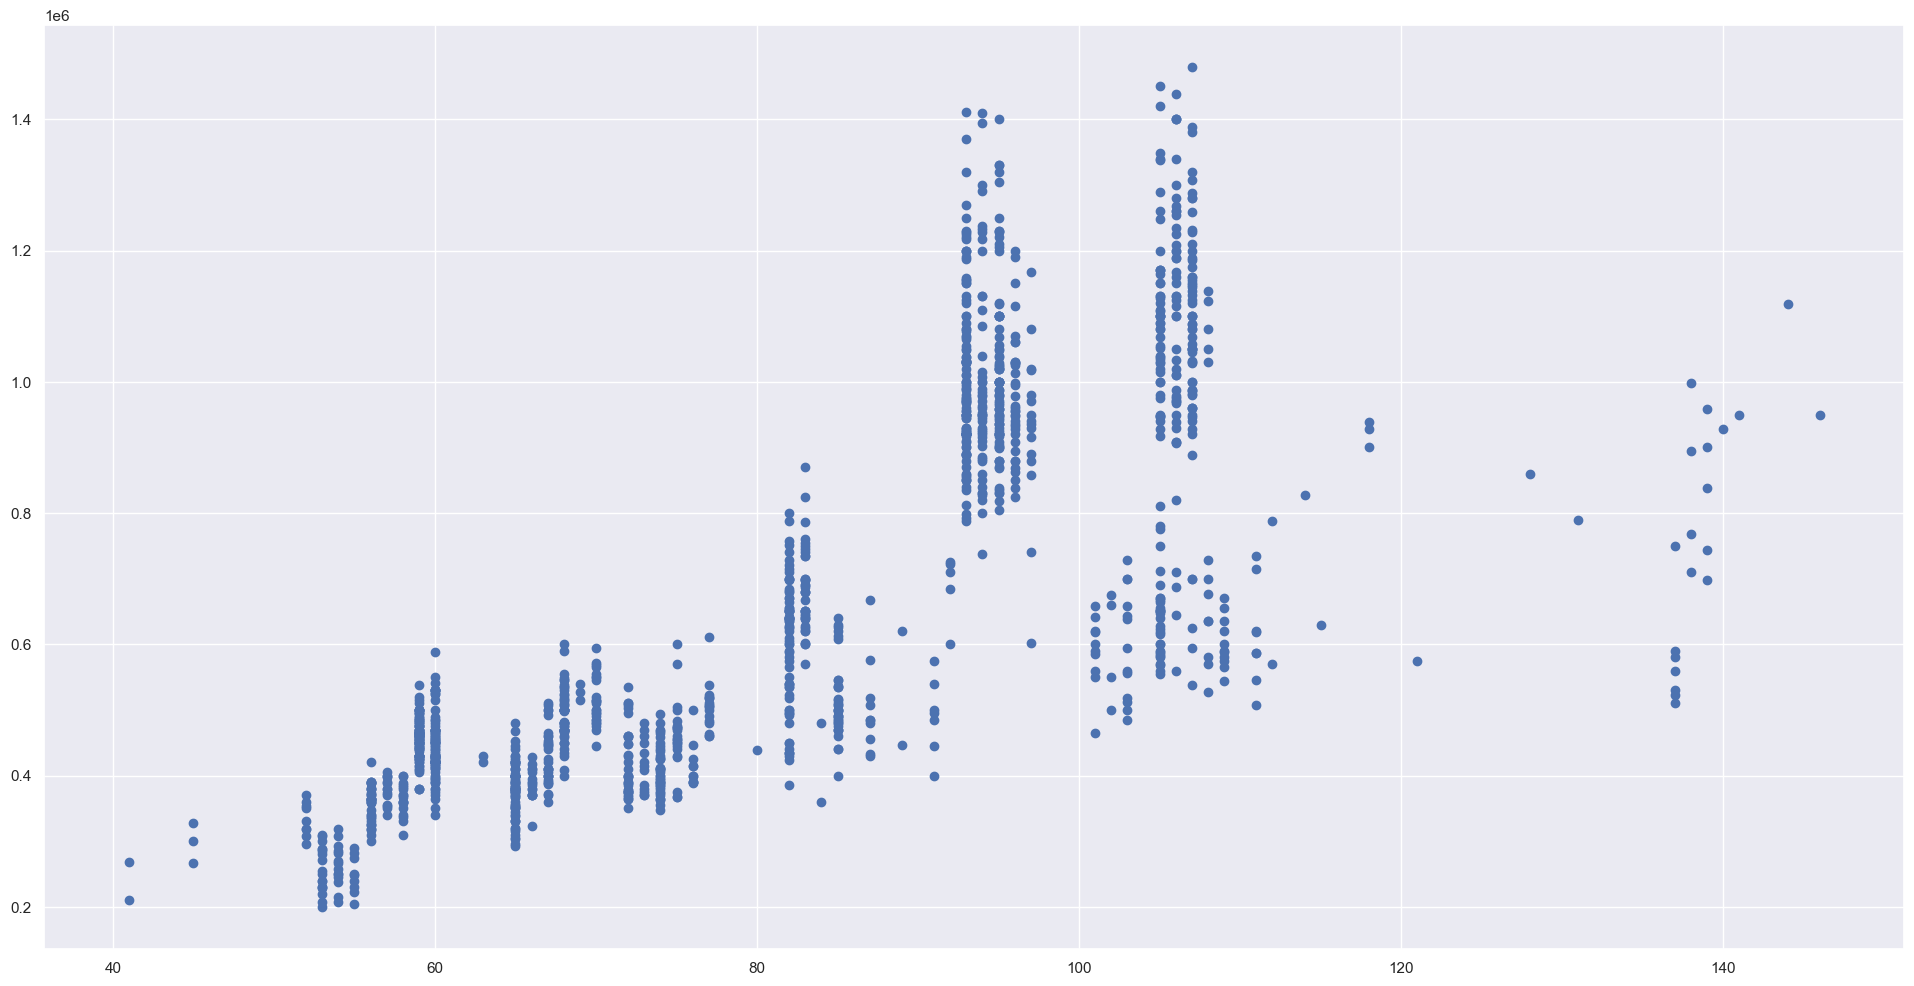

In [35]:
f= plt.subplots(figsize=(24, 12))   
plt.scatter(x = HDB_floor, y = HDB_price)

In [36]:
#import linear regression learning model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error #Required if mean squared error to use to measure accuracy
from sklearn.model_selection import train_test_split #Required if train and test sets to be randomly selected
linreg = LinearRegression()


## 1. Linear Regression of Floor Square Meter against Resale Price

In [38]:
#check the dimension of dataset floor square meter and price
print("Train Set :", HDB_floor.shape)
print("Test Set  :", HDB_price.shape)

Train Set : (1407, 1)
Test Set  : (1407, 1)


In [39]:
#split the data into training (approximately 75% of the dataset) and train (approximately 25%) set

HDB_floor_train = pd.DataFrame(HDB_floor[:1054])
HDB_floor_test  = pd.DataFrame(HDB_floor[-351:])

HDB_price_train = pd.DataFrame(HDB_price[:1054])
HDB_price_test  = pd.DataFrame(HDB_price[-351:])

# Check the sample sizes
print("Train Set :", HDB_floor_train.shape, HDB_price_train.shape)
print("Test Set  :", HDB_floor_test.shape, HDB_price_test.shape)

Train Set : (1054, 1) (1054, 1)
Test Set  : (351, 1) (351, 1)


Intercept of floor area sqm 	: b =  [-285492.89997504]
Coefficients of floor area sqm 	: a =  [[11334.05279884]]


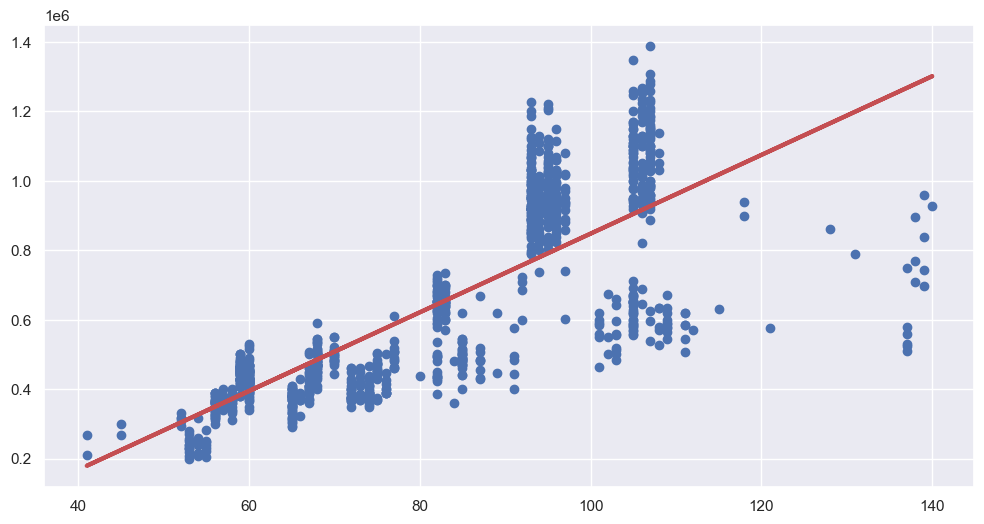

In [40]:
linreg.fit(HDB_floor_train, HDB_price_train)

# Check intercept # y = ax + b
print("Intercept of floor area sqm \t: b = ", linreg.intercept_)

# Check gradient
print("Coefficients of floor area sqm \t: a = ", linreg.coef_)

HDB_price_pred = linreg.predict(HDB_floor_test) 

# Formula for the Regression line
regline_x = HDB_floor_train
regline_y = linreg.intercept_ + linreg.coef_ * HDB_floor_train

# Plot the Linear Regression line
plt.figure(figsize=(12, 6))
plt.scatter(HDB_floor_train, HDB_price_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)

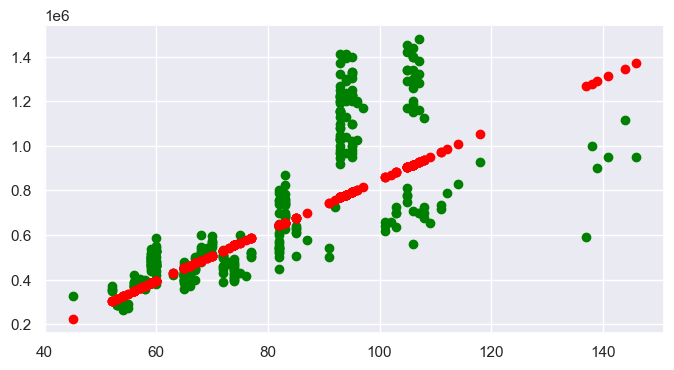

In [41]:
#use the test set
HDB_price_pred = linreg.predict(HDB_floor_test) 

#plot test set
plt.figure(figsize=(8,4))
plt.scatter(HDB_floor_test, HDB_price_test, color = 'green')   #test data
plt.scatter(HDB_floor_test, HDB_price_pred, color = 'red')     #predicted data

In [44]:
#calculate the correlation value for both train and test set

R2_HDB_floor_train = linreg.score(HDB_floor_train, HDB_price_train)
print("Explained variance R^2 for train set \t:", R2_HDB_floor_train)

R2_HDB_floor_test = linreg.score(HDB_floor_test, HDB_price_test)
print("Explained variance R^2 for test set \t:", R2_HDB_floor_test)

R2_Tables = list()

#collate the calculated R2 into one list
Temp = ['HDB_floor', R2_HDB_floor_train, R2_HDB_floor_test]
R2_Tables.append(Temp)
R2_Tables

Explained variance R^2 for train set 	: 0.6007402545113181
Explained variance R^2 for test set 	: 0.5201584430906864


[['HDB_floor', 0.6007402545113181, 0.5201584430906864]]

## 2. Linear Regression of Lease Commence Date against Resale Price

In [ ]:
#check the dimension of dataset lease commence date and price
print("Train Set :", HDB_remaininglease.shape)
print("Test Set  :", HDB_price.shape)

In [45]:
#split the data into training (approximately 75% of the dataset) and train (approximately 25%) set

HDB_leasedate_train = pd.DataFrame(HDB_remaininglease[:1054])
HDB_leasedate_test  = pd.DataFrame(HDB_remaininglease[-351:])

HDB_price_train = pd.DataFrame(HDB_price[:1054])
HDB_price_test  = pd.DataFrame(HDB_price[-351:])

# Check the sample sizes
print("Train Set :", HDB_leasedate_train.shape, HDB_price_train.shape)
print("Test Set  :", HDB_leasedate_test.shape, HDB_price_test.shape)

Train Set : (1054, 1) (1054, 1)
Test Set  : (351, 1) (351, 1)


Intercept of lease commence date 	: b =  [-473225.7492023]
Coefficients of lease commence date 	: a =  [[1318.06932477]]


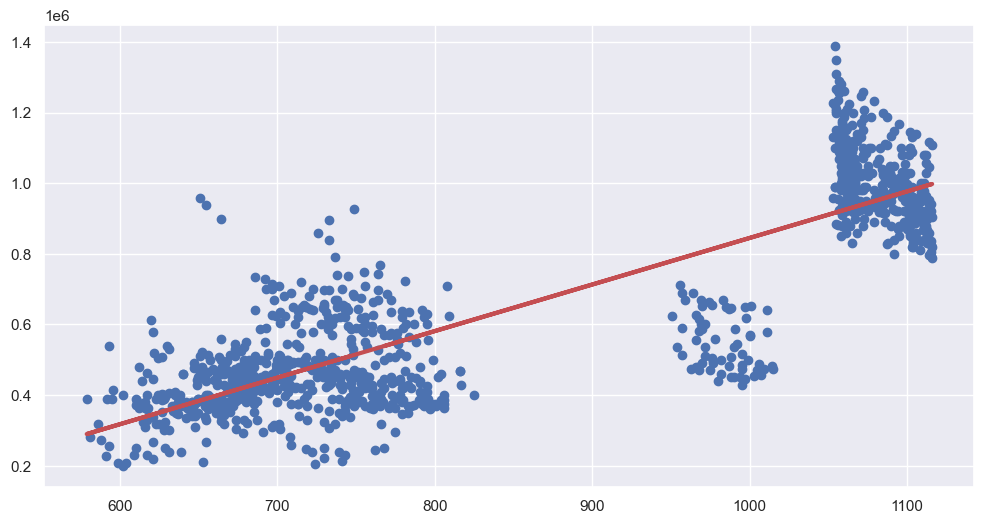

In [46]:
linreg.fit(HDB_leasedate_train, HDB_price_train)

# Check intercept # y = ax + b
print("Intercept of lease commence date \t: b = ", linreg.intercept_)

# Check gradient
print("Coefficients of lease commence date \t: a = ", linreg.coef_)

HDB_price_pred = linreg.predict(HDB_leasedate_test) 

# Formula for the Regression line
regline_x = HDB_leasedate_train
regline_y = linreg.intercept_ + linreg.coef_ * HDB_leasedate_train

# Plot the Linear Regression line
plt.figure(figsize=(12, 6))
plt.scatter(HDB_leasedate_train, HDB_price_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)

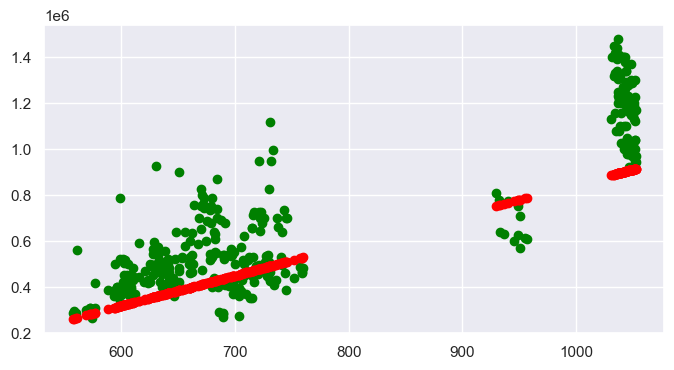

In [47]:
#use the test set
HDB_price_pred = linreg.predict(HDB_leasedate_test) 

#plot test set
plt.figure(figsize=(8,4))
plt.scatter(HDB_leasedate_test, HDB_price_test, color = 'green')   #test data
plt.scatter(HDB_leasedate_test, HDB_price_pred, color = 'red')     #predicted data

In [48]:
#calculate the correlation value for both train and test set
R2_HDB_leasedate_train = linreg.score(HDB_leasedate_train, HDB_price_train)
print("Explained variance R^2 for train set \t:", R2_HDB_leasedate_train)

R2_HDB_leasedate_test = linreg.score(HDB_leasedate_test, HDB_price_test)
print("Explained variance R^2 for test set \t:", R2_HDB_leasedate_test)

#collate the calculated R2 into one list
Temp = ['HDB_leasedate', R2_HDB_leasedate_train, R2_HDB_leasedate_test]
R2_Tables.append(Temp)
R2_Tables

Explained variance R^2 for train set 	: 0.7440898972337209
Explained variance R^2 for test set 	: 0.5436503936376231


[['HDB_floor', 0.6007402545113181, 0.5201584430906864],
 ['HDB_leasedate', 0.7440898972337209, 0.5436503936376231]]

## 3. Multi-Variate Linear Regression

In [49]:
#Extract the variables
HDB_predictor = pd.DataFrame(HDB_numdata[['floor_area_sqm','remaining_lease_in_months']])
HDB_price = pd.DataFrame(HDB_numdata['resale_price'])

In [50]:
# Split the dataset into Train and Test       
HDB_predictor_train = pd.DataFrame(HDB_predictor[:1054])
HDB_predictor_test  = pd.DataFrame(HDB_predictor[-351:])
HDB_price_train = pd.DataFrame(HDB_price[:1054])
HDB_price_test  = pd.DataFrame(HDB_price[-351:])

# Train the Linear Regression model
linreg.fit(HDB_predictor_train, HDB_price_train)

LinearRegression()

In [51]:
#Determine the intercept and coefficients of line modeled through linear regression for multi variables
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)


Intercept 	: b =  [-575974.95420449]
Coefficients 	: a =  [[4965.13456246  957.45137707]]


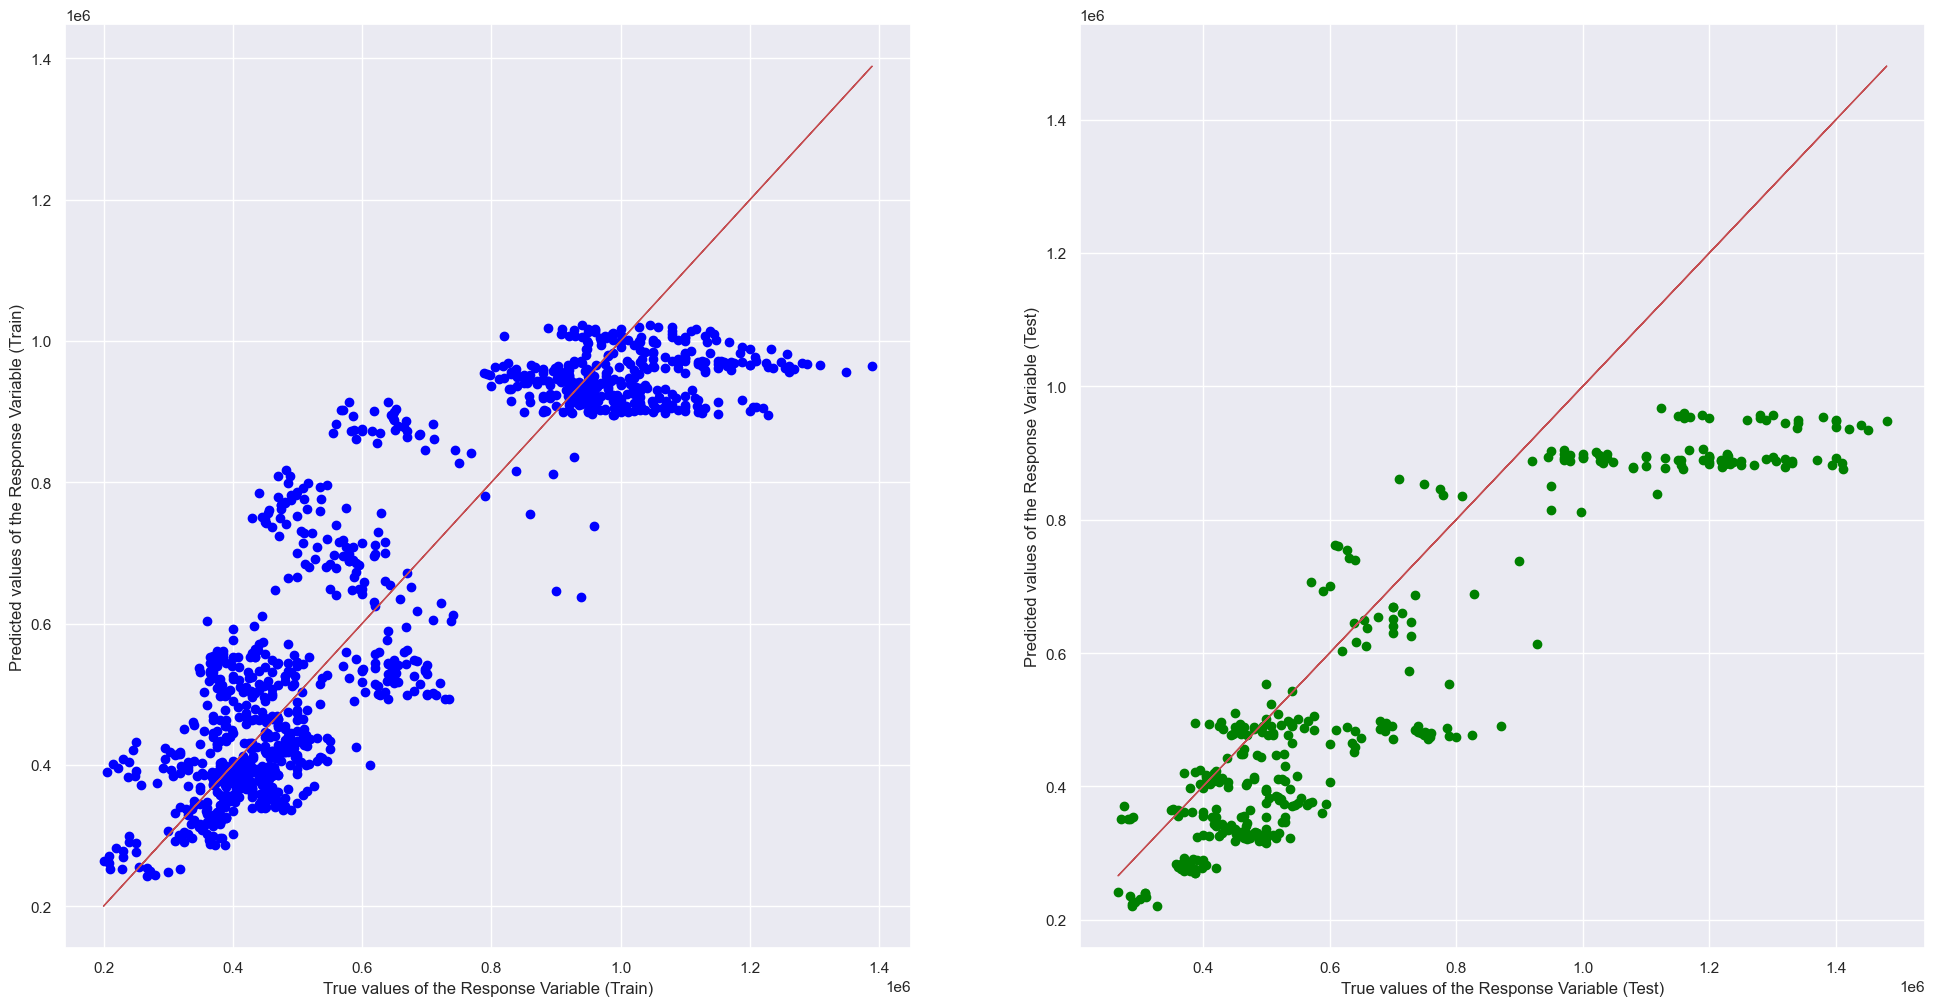

In [52]:
# Predict resale_price values corresponding to the four varibles
HDB_price_train_pred = linreg.predict(HDB_predictor_train)
HDB_price_test_pred = linreg.predict(HDB_predictor_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(HDB_price_train, HDB_price_train_pred, color = "blue")
axes[0].plot(HDB_price_train, HDB_price_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

axes[1].scatter(HDB_price_test, HDB_price_test_pred, color = "green")
axes[1].plot(HDB_price_test, HDB_price_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [53]:
#calculate the correlation value for both train and test set
print("Explained Variance (R^2) on Train Set \t:", linreg.score(HDB_predictor_train, HDB_price_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(HDB_predictor_test, HDB_price_test))

#collate the calculated R2 into one list
Temp = ['Multi_Variables', linreg.score(HDB_predictor_train, HDB_price_train), linreg.score(HDB_predictor_test, HDB_price_test)]
R2_Tables.append(Temp)
R2_Tables

Explained Variance (R^2) on Train Set 	: 0.8036778508433042
Explained Variance (R^2) on Test Set 	: 0.6431891244354749


[['HDB_floor', 0.6007402545113181, 0.5201584430906864],
 ['HDB_leasedate', 0.7440898972337209, 0.5436503936376231],
 ['Multi_Variables', 0.8036778508433042, 0.6431891244354749]]

As observed from the collated calculated R^2, it is evident that the multi variable linear regression is the best for predicting resale price in central area given flat type, floor square area, storey range with the highest test and train R^2 of 0.7758 and 0.8881 respectively.\
\
Equation: Resale Price = 74898.24*(flattype) + 2021.09*(floor) + 8363.31*(leasedate) + 106348.06*(storey) - 16606746.78

## Anomaly Detection for 2 Room HDB

In [69]:
HDB_floor_price = pd.concat([HDB_floor, HDB_price], axis=1)
HDB_floor_price

,floor_area_sqm,resale_price
299,55,250000
300,84,360000
301,68,400000
302,66,428000
303,59,455000
...,...,...
172228,72,510000
172229,60,530000
172230,94,1130000
172231,77,500000


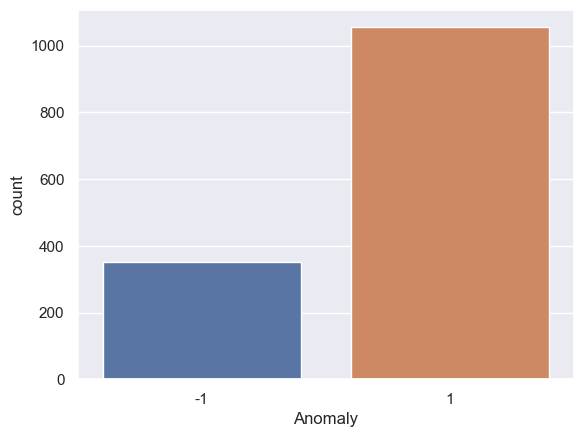

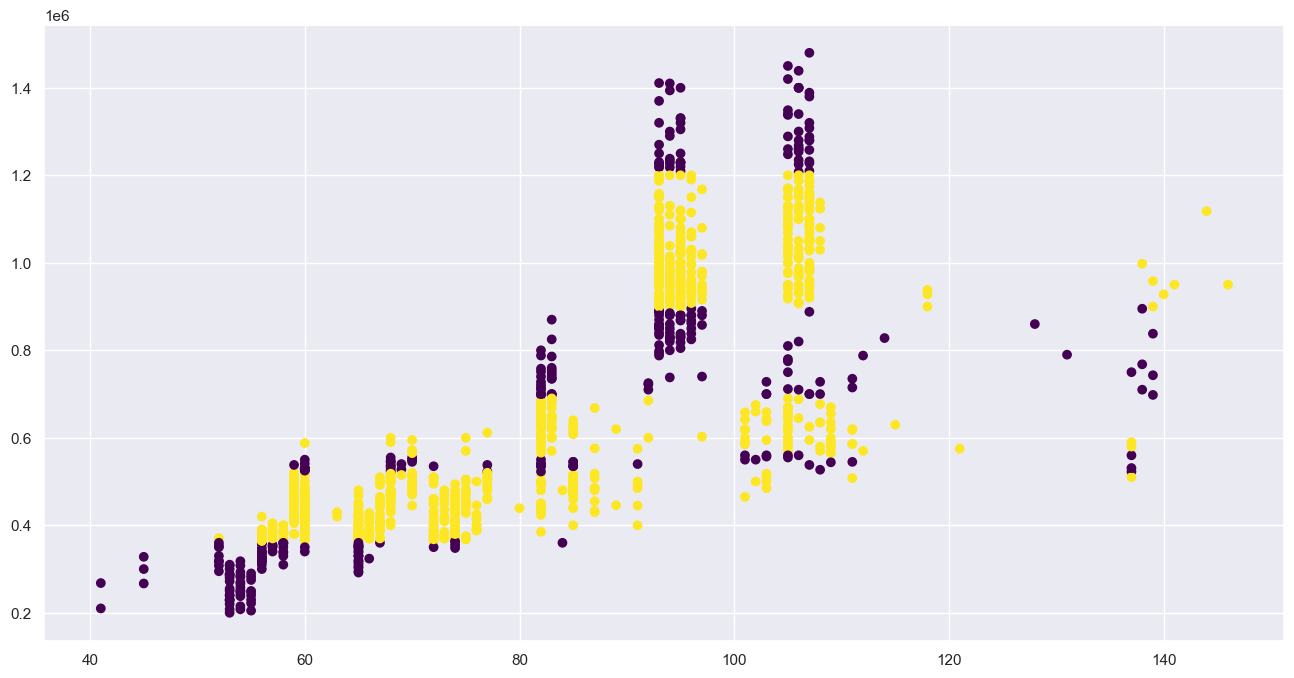

In [76]:
# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 100     # Number of Neighbors
cont_fraction = 0.25  # Fraction of Anomalies (max 0.5)

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

#Fit the model on the data and predict anomalies
labels = lof.fit_predict(HDB_floor_price)

HDB_floor_price_labeled = HDB_floor_price.copy()
HDB_floor_price_labeled['Anomaly'] = pd.Categorical(labels)
sb.countplot(x = 'Anomaly', data = HDB_floor_price_labeled)


f = plt.subplots(figsize=(16,8))
plt.scatter(x = "floor_area_sqm", y = "resale_price", c = 'Anomaly', cmap = 'viridis', data = HDB_floor_price_labeled)

In [77]:
HDB_floor_price_labeled

,floor_area_sqm,resale_price,Anomaly
299,55,250000,-1
300,84,360000,-1
301,68,400000,1
302,66,428000,1
303,59,455000,1
...,...,...,...
172228,72,510000,1
172229,60,530000,-1
172230,94,1130000,1
172231,77,500000,1


In [79]:
HDB_floor_price_anomalies = HDB_floor_price_labeled[HDB_floor_price_labeled['Anomaly'] == -1]
HDB_floor_price_anomalies

,floor_area_sqm,resale_price,Anomaly
299,55,250000,-1
300,84,360000,-1
307,93,788000,-1
308,95,818000,-1
1439,93,793000,-1
...,...,...,...
169754,103,700000,-1
169755,105,1450000,-1
169756,105,810000,-1
172229,60,530000,-1


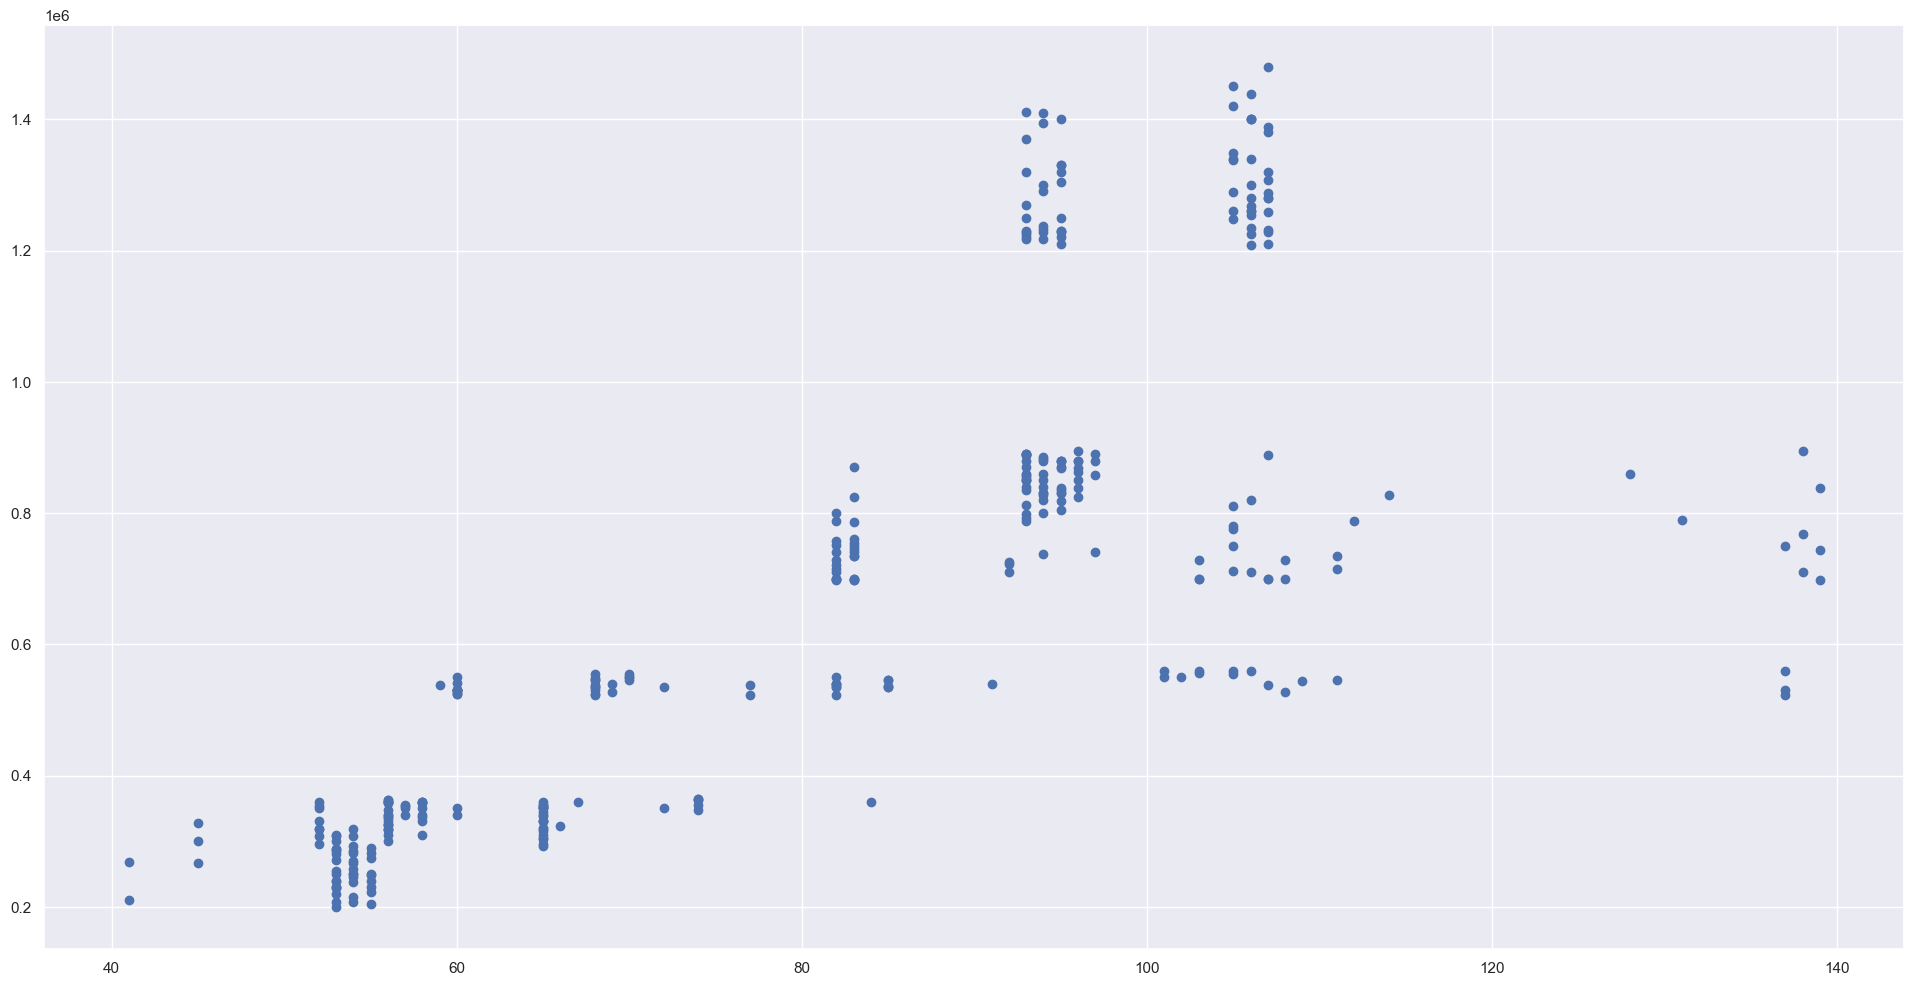

In [80]:
f= plt.subplots(figsize=(24, 12))   
plt.scatter(x = 'floor_area_sqm', y = 'resale_price',data=HDB_floor_price_anomalies)

In [83]:
HDB_flattype = pd.DataFrame(HDB_central['flat_type'])

In [84]:
HDB_floor_price = pd.concat([HDB_flattype, HDB_floor, HDB_price], axis=1)
HDB_floor_price

,flat_type,floor_area_sqm,resale_price
299,2 ROOM,55,250000
300,3 ROOM,84,360000
301,3 ROOM,68,400000
302,3 ROOM,66,428000
303,3 ROOM,59,455000
...,...,...,...
172228,3 ROOM,72,510000
172229,3 ROOM,60,530000
172230,4 ROOM,94,1130000
172231,4 ROOM,77,500000


In [86]:
HDB_4room = HDB_floor_price[HDB_floor_price['flat_type'] == '4 ROOM']
HDB_4room

,flat_type,floor_area_sqm,resale_price
306,4 ROOM,82,685000
307,4 ROOM,93,788000
308,4 ROOM,95,818000
309,4 ROOM,95,903000
1437,4 ROOM,77,480000
...,...,...,...
169752,4 ROOM,82,540000
169753,4 ROOM,83,755000
169754,4 ROOM,103,700000
172230,4 ROOM,94,1130000


In [93]:
HDB_4room_floor = pd.DataFrame(HDB_4room['floor_area_sqm'])
HDB_4room_price = pd.DataFrame(HDB_4room['resale_price'])
HDB_4room = pd.concat([HDB_4room_floor,HDB_4room_price],axis=1)
HDB_4room

,floor_area_sqm,resale_price
306,82,685000
307,93,788000
308,95,818000
309,95,903000
1437,77,480000
...,...,...
169752,82,540000
169753,83,755000
169754,103,700000
172230,94,1130000


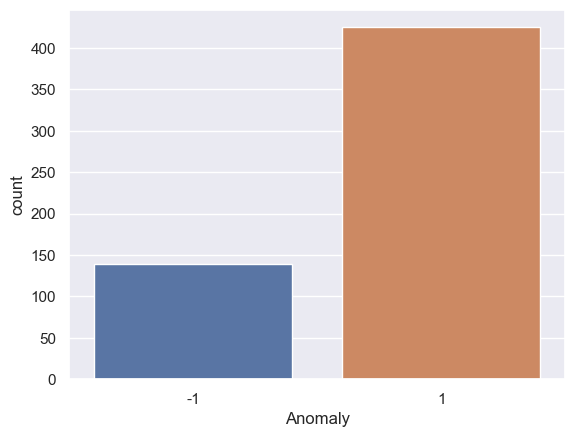

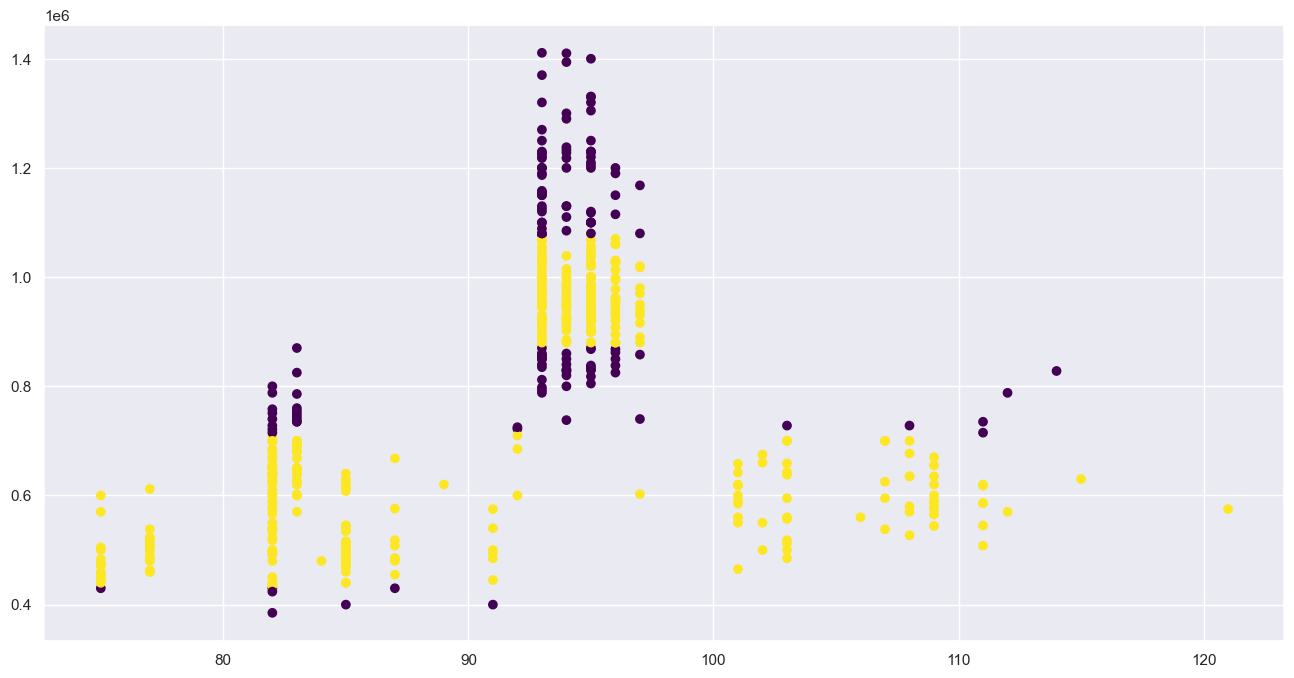

In [103]:
# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 88     # Number of Neighbors
cont_fraction = 0.25  # Fraction of Anomalies (max 0.5)

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

#Fit the model on the data and predict anomalies
labels = lof.fit_predict(HDB_4room)

HDB_4room_labeled = HDB_4room.copy()
HDB_4room_labeled['Anomaly'] = pd.Categorical(labels)
sb.countplot(x = 'Anomaly', data = HDB_4room_labeled)


f = plt.subplots(figsize=(16,8))
plt.scatter(x = "floor_area_sqm", y = "resale_price", c = 'Anomaly', cmap = 'viridis', data = HDB_4room_labeled)

In [96]:
HDB_4room_labeled


,floor_area_sqm,resale_price,Anomaly
306,82,685000,1
307,93,788000,-1
308,95,818000,-1
309,95,903000,-1
1437,77,480000,1
...,...,...,...
169752,82,540000,1
169753,83,755000,-1
169754,103,700000,1
172230,94,1130000,-1


In [97]:
HDB_4room_anomalies = HDB_4room_labeled[HDB_4room_labeled['Anomaly'] == -1]
HDB_4room_anomalies

,floor_area_sqm,resale_price,Anomaly
307,93,788000,-1
308,95,818000,-1
309,95,903000,-1
1439,93,793000,-1
1440,95,805000,-1
...,...,...,...
167636,82,523000,-1
167637,93,1410888,-1
167638,93,1158000,-1
169753,83,755000,-1
